### PCA Analysis on Smart Building Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

### Load metadata and identify a room, here we picked room Rm-3126 and found there are 16 files to process

In [1]:
path = "./ebu3b/data/"
metadata = "ebu3b_metadata.csv"
df_meta = pd.read_csv(path+metadata)

Script that plots, for a given day, the three signals as a function of the time-of-day.

Take care to:
* Make the figure large.
* Use time of day to index the X axis.
* Scale the signals and/or use multiple Y axis so that all of the signals occupy the full vertical range.
* Add labels to the x axis, the y axes and the plot as a whole.
* Add a legend.
* Add a grid.

Once you have this script, share with me a notebook with grids of figures for
1. Different rooms on the same day
2. Different days for the same room.

In [101]:
def plot_signal(rm,signals,start,end):
    path = "./ebu3b/data/"
    metadata = "ebu3b_metadata.csv"
    df_meta = pd.read_csv(path+metadata)
    df_meta[df_meta.Location==rm]['Unique Identifier'].values
    dfall=pd.DataFrame()
    for f in df_meta[(df_meta.Location=='Rm-3126')&(df_meta["Ground Truth Point Type"].isin(signals))]['Unique Identifier'].values:
        data = f+".csv"
        print data
        df = pd.read_csv(path+data)
        df["identifier"] = f
        df['location'] = rm
        dfall = dfall.append(df,ignore_index=True)
    df_rm_meta = dfall.merge(df_meta,right_on="Unique Identifier",left_on="identifier")
    df_rm_signals = df_rm_meta[["time","value","identifier","location","Ground Truth Point Type"]]
    rm_signals = df_rm_signals.pivot_table(values='value', index=['time', 'location'], \
                                                   columns="Ground Truth Point Type").reset_index()

    start = pd.to_datetime(start, format='%Y%m%d', infer_datetime_format=True)
    end = pd.to_datetime(end, format='%Y%m%d', infer_datetime_format=True)

    rm_signals.time = pd.to_datetime(df_roo.time)
    df = rm_signals[(rm_signals.time.dt.date>=start.date())&(rm_signals.time.dt.date<=end.date())]
    df= df.set_index("time")
    if len(signals) == 2:
        ax = plt.plot()
        ax = df[signals[0]].dropna().plot(figsize=(18,10),legend=True,grid=True)
        ax.set_ylabel(signals[0]+" values")
        df[signals[1]].dropna().plot(secondary_y=True,style='g:', ax=ax,legend=True,grid=True)
        ax.set_title("Plot for Signals "+str(signals)+" for room %s"%(rm) + "for date range %s, %s"%(start,end))
        plt.ylabel(signals[1]+" values")
    else:
        for sig in signals:
            ax= plt.plot()
            ax = df[sig].dropna().plot(figsize=(18,10),legend=True,grid=True)
            ax.set_title("Plot for Signals "+str(signals)+" for room %s"%(rm) + " for date range %s, %s"%(start,end))

### Dual Axis plot if only 2 signals into consideration

506_0_3003036.csv
506_0_3003042.csv


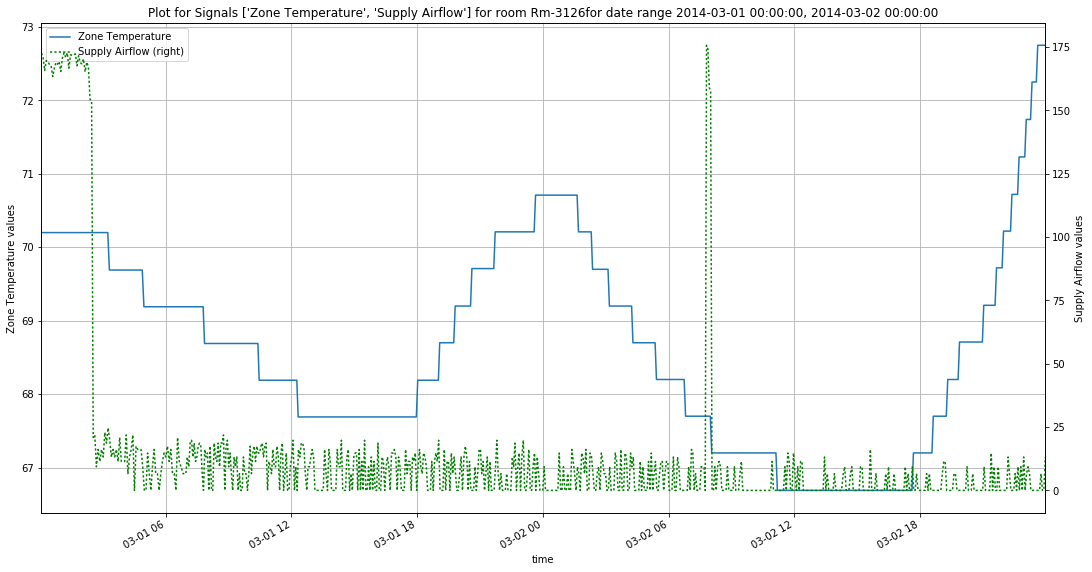

In [102]:
signals = ["Zone Temperature","Supply Airflow"]
rm= "Rm-3126"
start = "2014-03-01"
end = "2014-03-02"

plot_signal(rm,signals,start,end)

### Different Rooms and Same Day

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


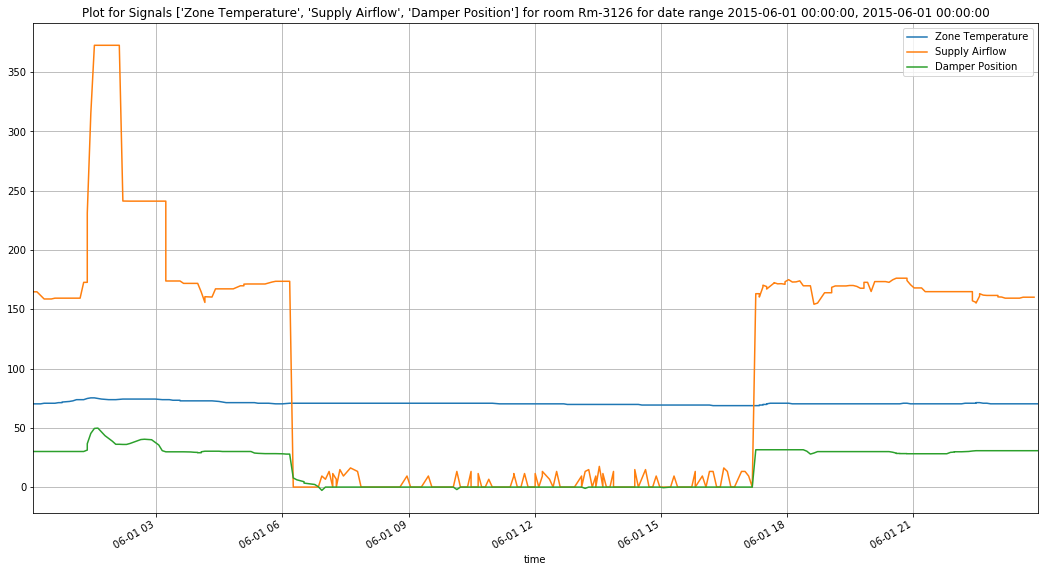

In [109]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm = "Rm-3126"
start = "2015-06-01"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


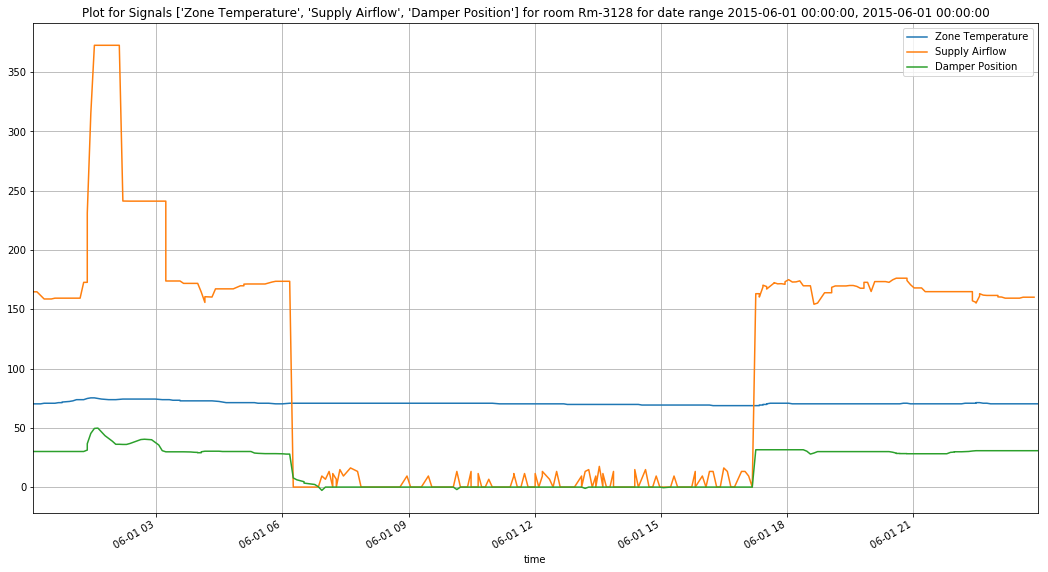

In [110]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3128"
start = "2015-06-01"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


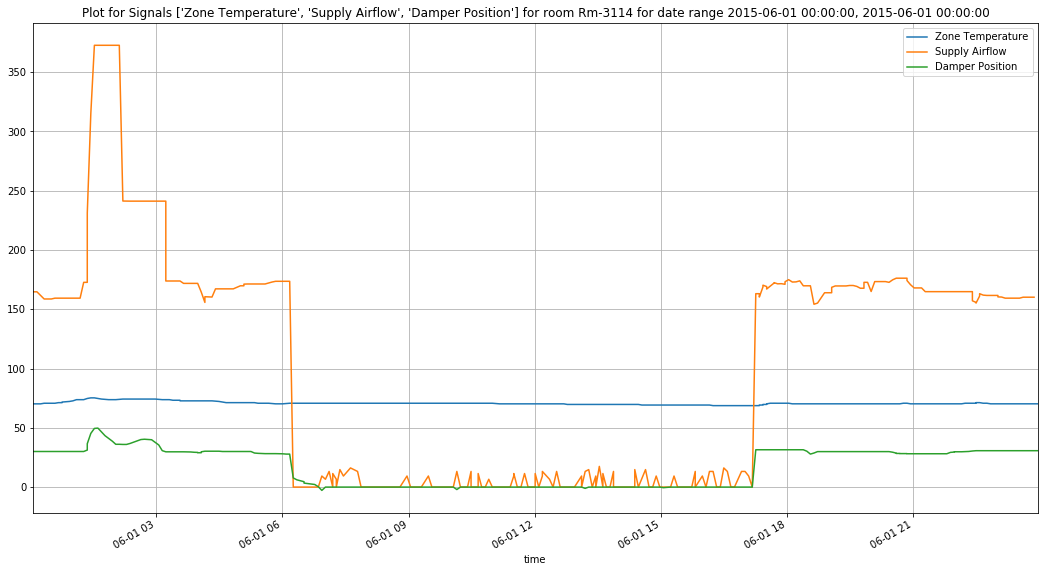

In [111]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3114"
start = "2015-06-01"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


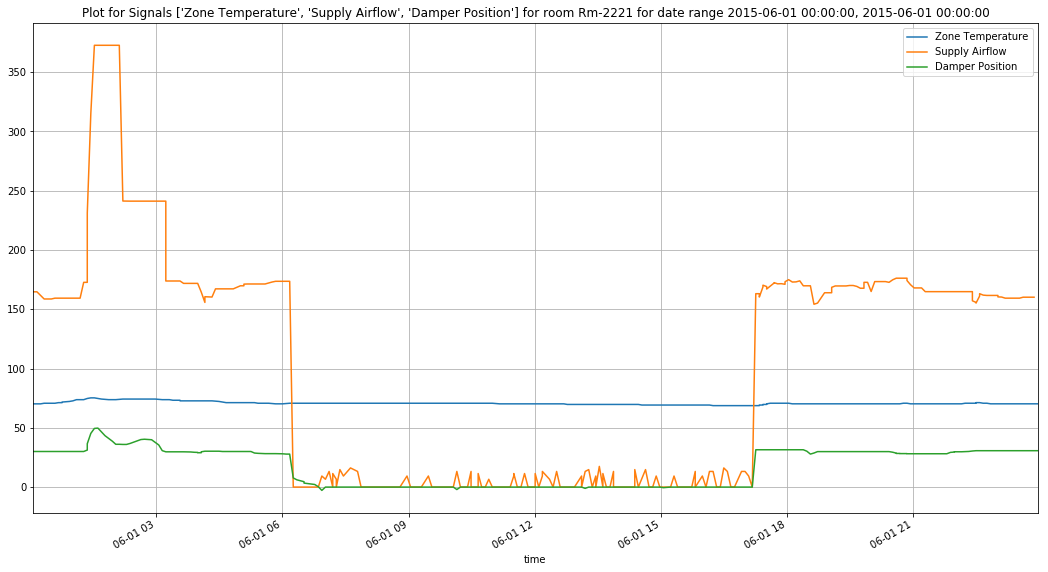

In [112]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-2221"
start = "2015-06-01"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

### Same Room Different Days

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


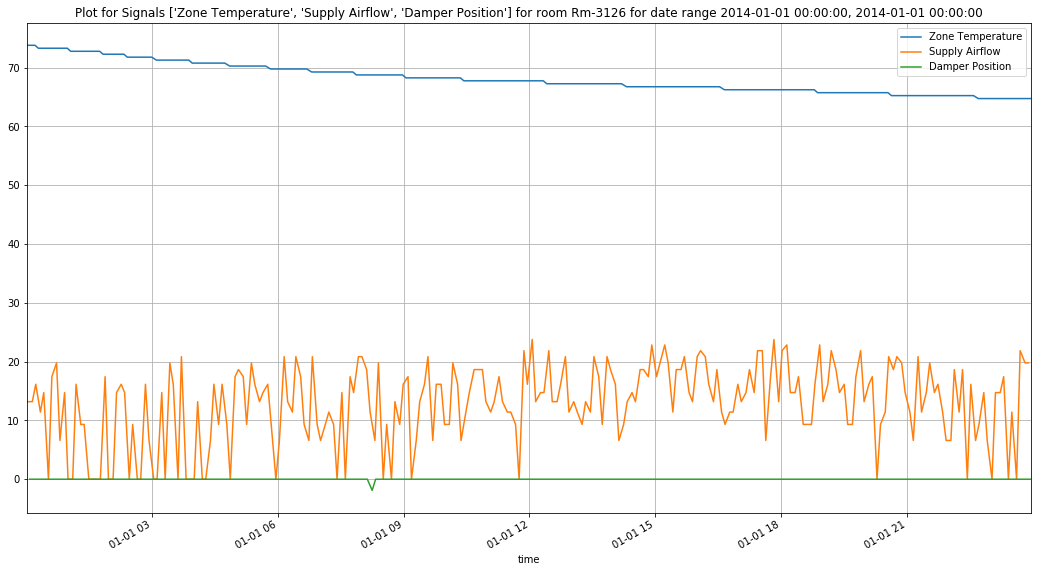

In [118]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2014-01-01"
end = "2014-01-01"

plot_signal(rm,signals,start,end)

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


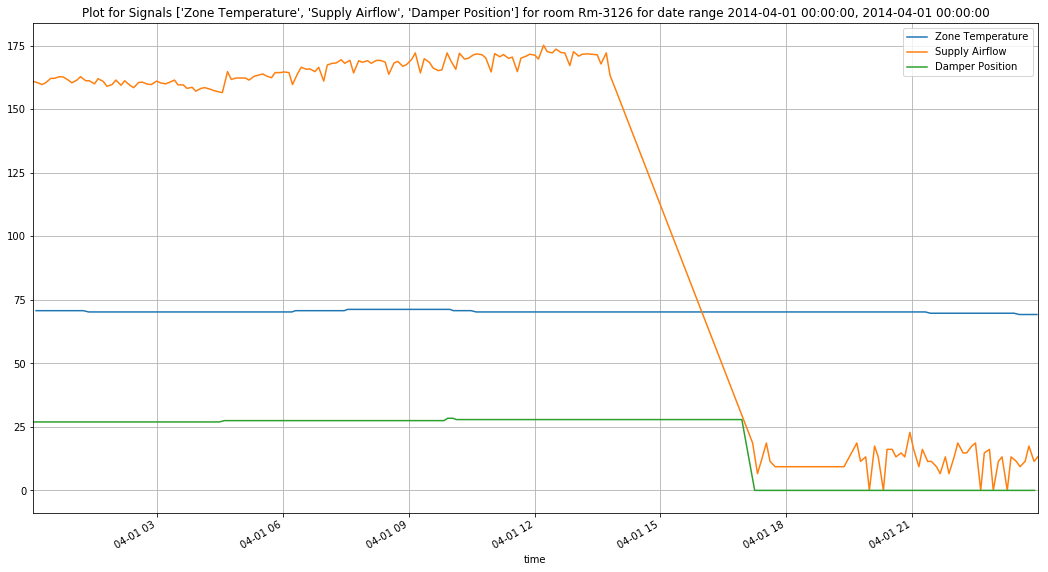

In [119]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2014-04-01"
end = "2014-04-01"

plot_signal(rm,signals,start,end)


506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


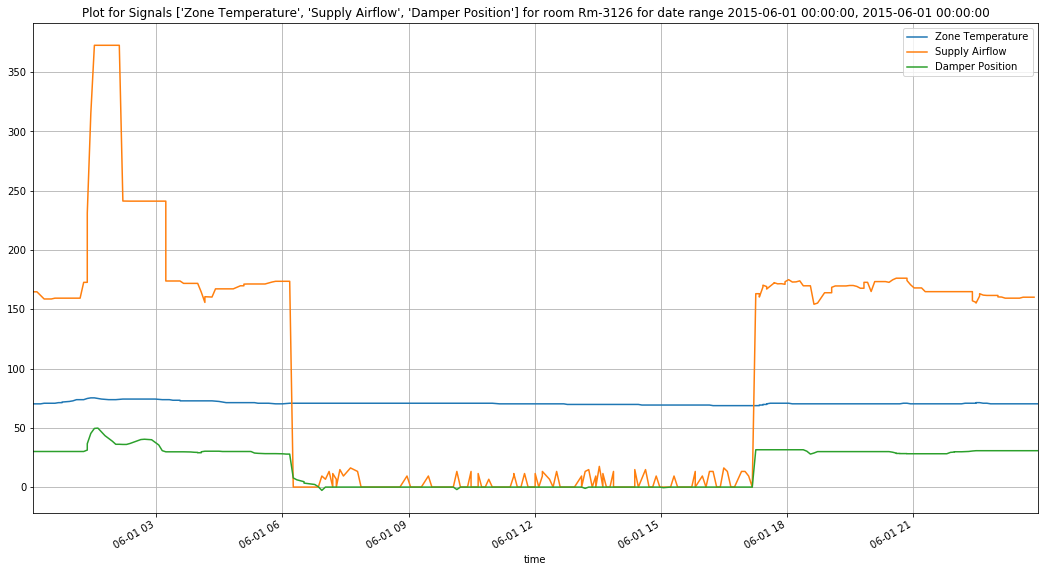

In [121]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2015-06-01"
end = "2015-06-01"

plot_signal(rm,signals,start,end)


506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


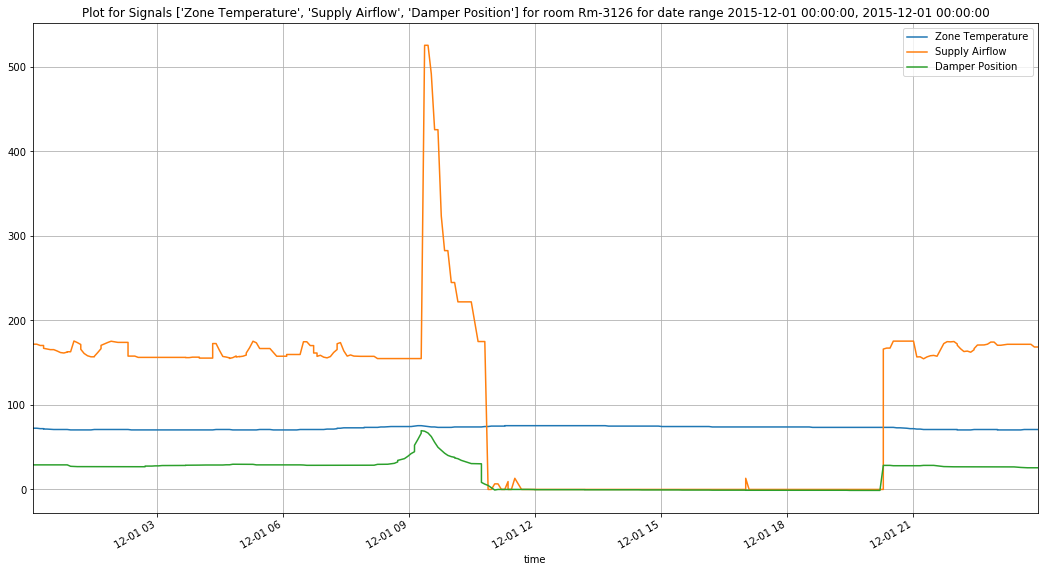

In [122]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2015-12-01"
end = "2015-12-01"

plot_signal(rm,signals,start,end)
